In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
models_name = [
    "basic-mini",
    "basic-base",
    "basic-large",
    "february_finetuned",
    "march_finetuned",
    "art-mini",
    "art-base",
    "art-large",
]
data = {}
for model_name in models_name:
    data[model_name] = {}
    data[model_name]["metrics"] = pd.read_csv(f"../../benchmarks/multilingual_results_{model_name}.csv")
    data[model_name]["positions"] = json.load(open(f"../../benchmarks/positions_specific_focus_{model_name}.json"))

In [3]:
def getdf(model_name, focus=None):
    if focus is None:
        df = data[model_name]["metrics"] 
    else:
        df = data[model_name]["metrics"][data[model_name]["metrics"]["focus"] == focus]
    df["model_name"] = model_name
    return df

In [4]:
dataframes_per_model = {}
for model_name in models_name:
    dataframes_per_model[model_name] = {}
    metrics = data[model_name]["metrics"]
    unique_focus = metrics["focus"].unique()
    for focus in unique_focus:
        dataframes_per_model[model_name][focus] = getdf(model_name, focus)

C:\Users\victo\AppData\Local\Temp\ipykernel_22868\3887354472.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["model_name"] = model_name
C:\Users\victo\AppData\Local\Temp\ipykernel_22868\3887354472.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["model_name"] = model_name
C:\Users\victo\AppData\Local\Temp\ipykernel_22868\3887354472.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

C:\Users\victo\AppData\Local\Temp\ipykernel_22868\2464819678.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


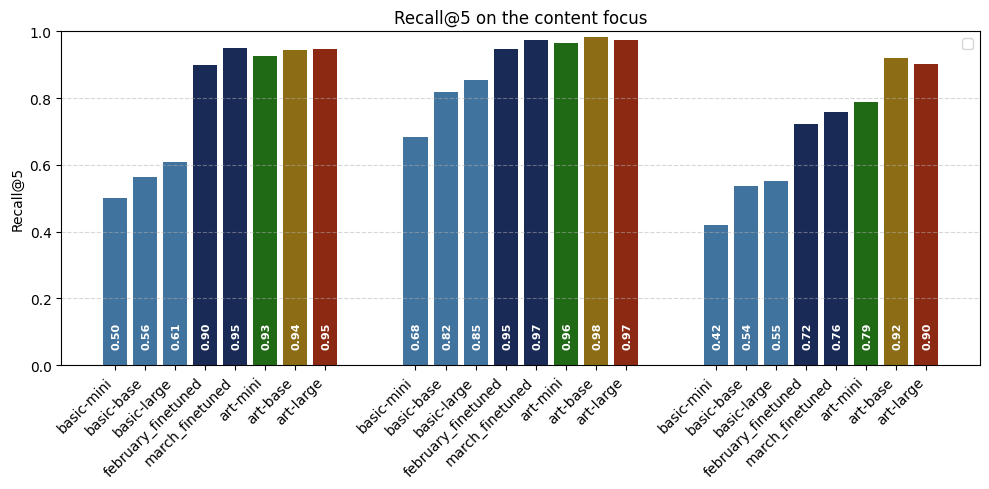

C:\Users\victo\AppData\Local\Temp\ipykernel_22868\2464819678.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


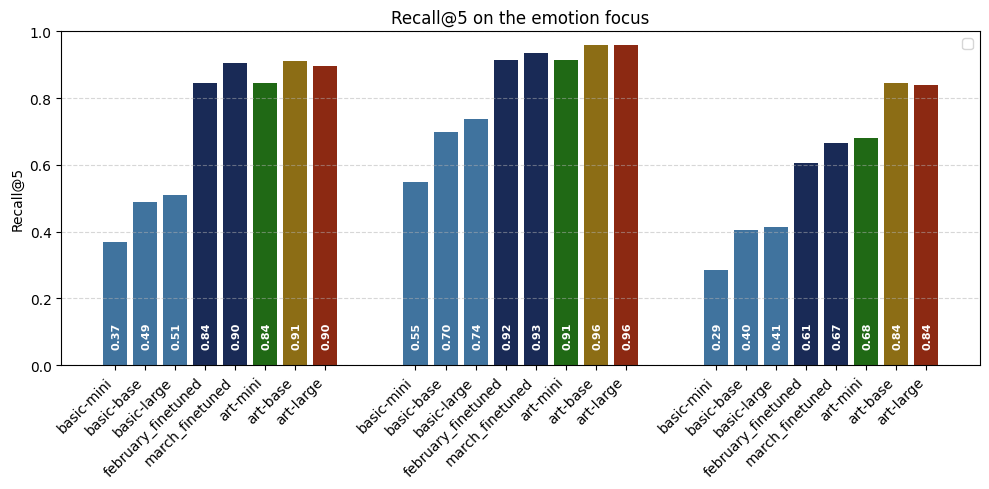

C:\Users\victo\AppData\Local\Temp\ipykernel_22868\2464819678.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


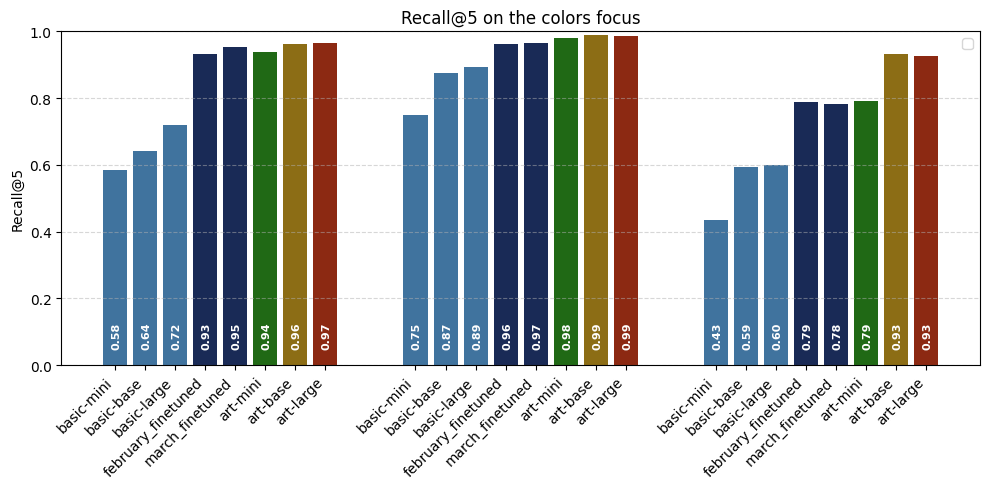

C:\Users\victo\AppData\Local\Temp\ipykernel_22868\2464819678.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


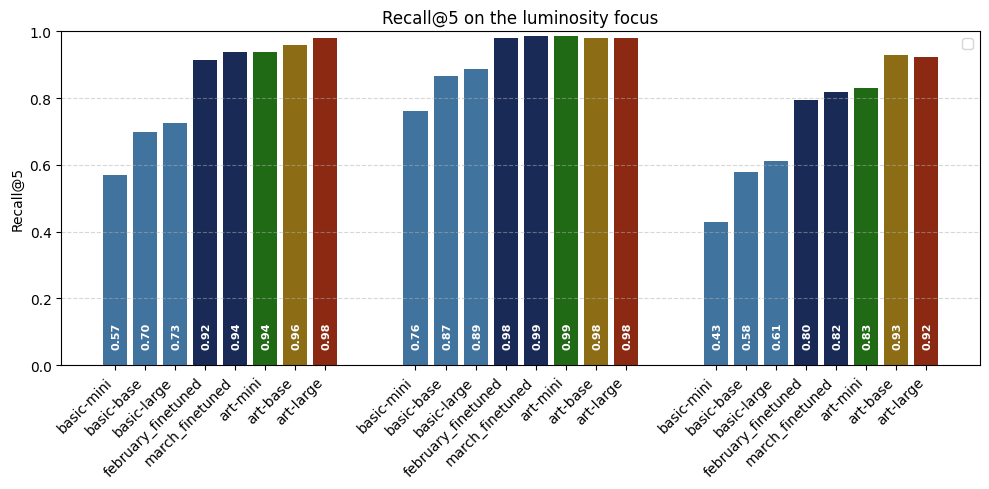

In [5]:
def plot_models_performance_on_specific_focus(focus):
    fig, ax = plt.subplots(figsize=(10, 5))

    bars_x = []
    bars_y = []
    bars_labels = []
    bars_colors = []
    bars_text = []

    langs = ["FR", "EN", "NL"]
    metricName = "recall@5"
    color=["#40739e", "#40739e", "#40739e", "#192a56", "#192a56", "#206915", "#8c6d15", "#8c2912"]
    color_per_model = {
        "basic-mini": color[0],
        "basic-base": color[1],
        "basic-large": color[2],
        "february_finetuned": color[3],
        "march_finetuned": color[4],
        "art-mini": color[5],
        "art-base": color[6],
        "art-large": color[7],
    }
    for lang_index, lang in enumerate(langs):

        starting_x = lang_index * (len(models_name) + 2)

        for model_index, model_name in enumerate(models_name):
            df = dataframes_per_model[model_name][focus]
            df_lang = df[df["lang"] == lang]
            metricValue = df_lang[metricName].values[0]
            bars_x.append(starting_x + model_index)
            bars_y.append(metricValue)
            bars_labels.append(f"{model_name}")
            bars_colors.append(color_per_model[model_name])
            bars_text.append(f"{metricValue:.2f}")

    # Add the 

    ax.bar(bars_x, bars_y, tick_label=bars_labels, color=bars_colors)
    # Add the text on the bottom of the bars
    for i, v in enumerate(bars_y):
        ax.text(bars_x[i]+0.05, 0.05, bars_text[i], ha="center", va="bottom", rotation=90, fontsize=8, color="white", fontweight="bold")
    # Add an horizontal line at y=0.9

    ax.set_ylabel("Recall@5")
    plt.legend()
    ax.set_title(f"Recall@5 on the {focus} focus")
    ax.set_xticks(bars_x)
    ax.set_xticklabels(bars_labels, rotation=45, ha="right")
    ax.set_ylim(0, 1)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.savefig(f"../../figures/analysis/per_focus/recall@5_{focus}.png", dpi=300, bbox_inches='tight')
    plt.show()

plot_models_performance_on_specific_focus("content")
plot_models_performance_on_specific_focus("emotion")
plot_models_performance_on_specific_focus("colors")
plot_models_performance_on_specific_focus("luminosity")

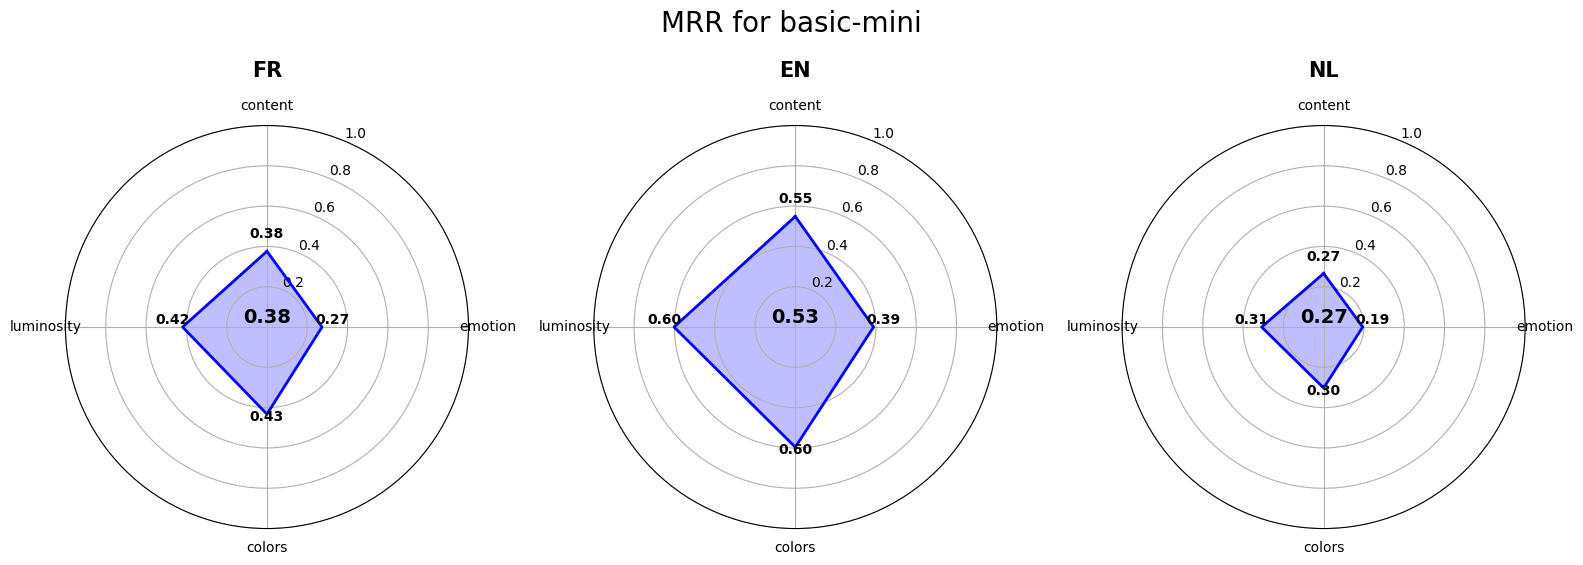

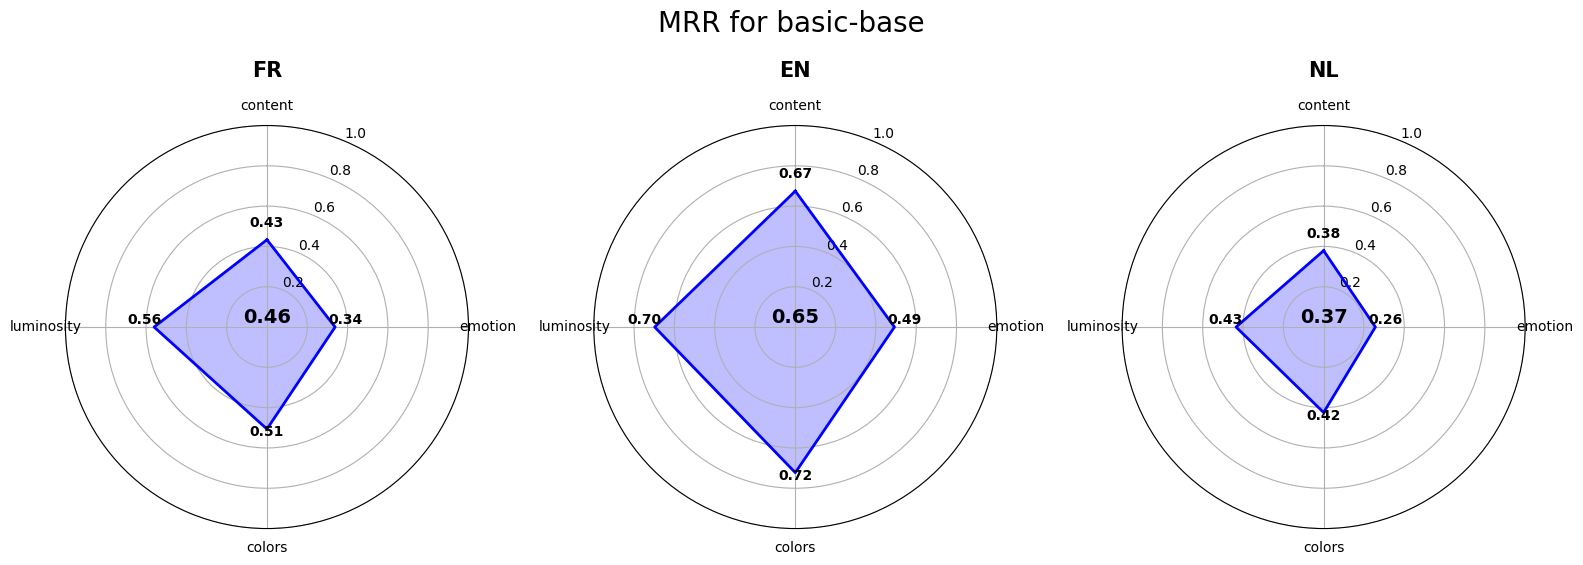

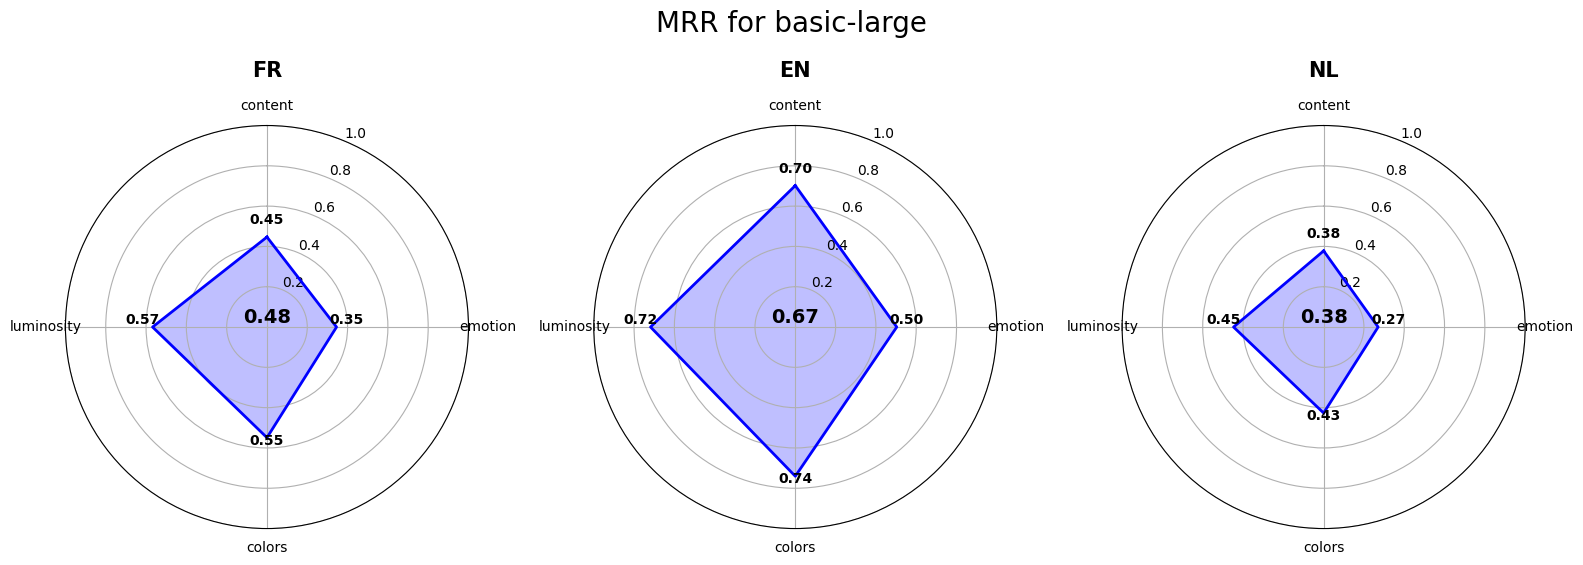

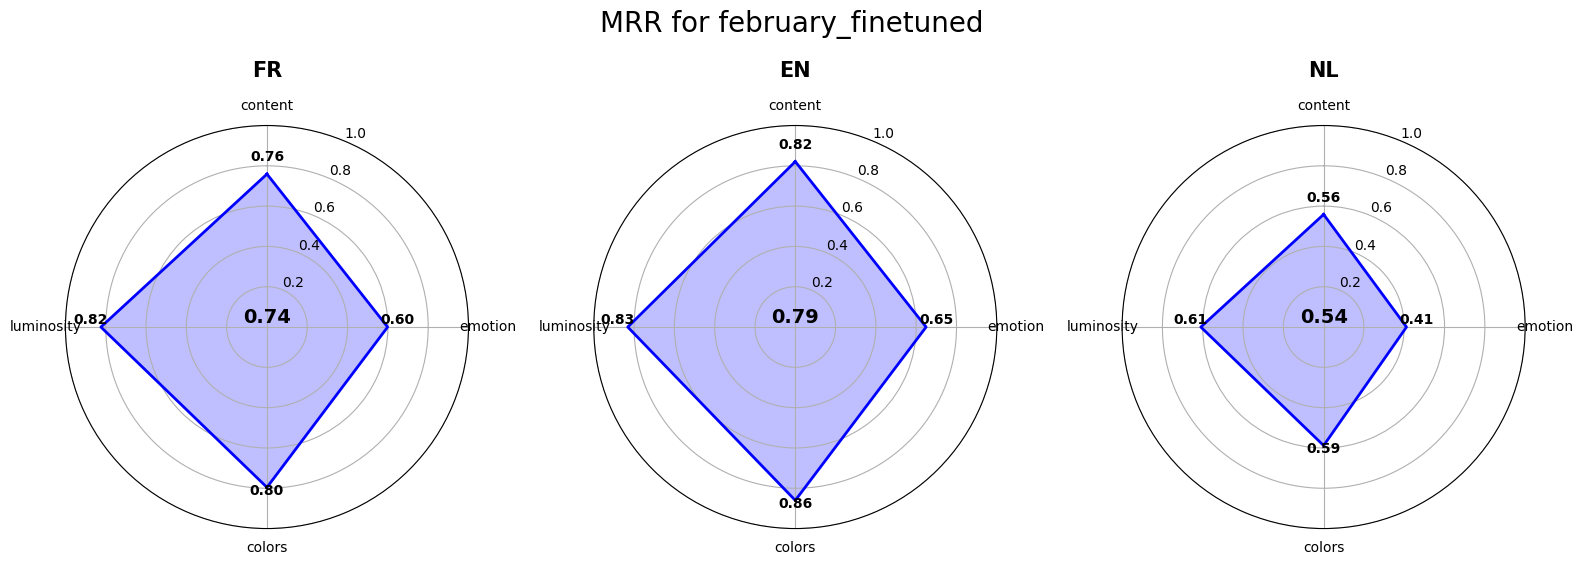

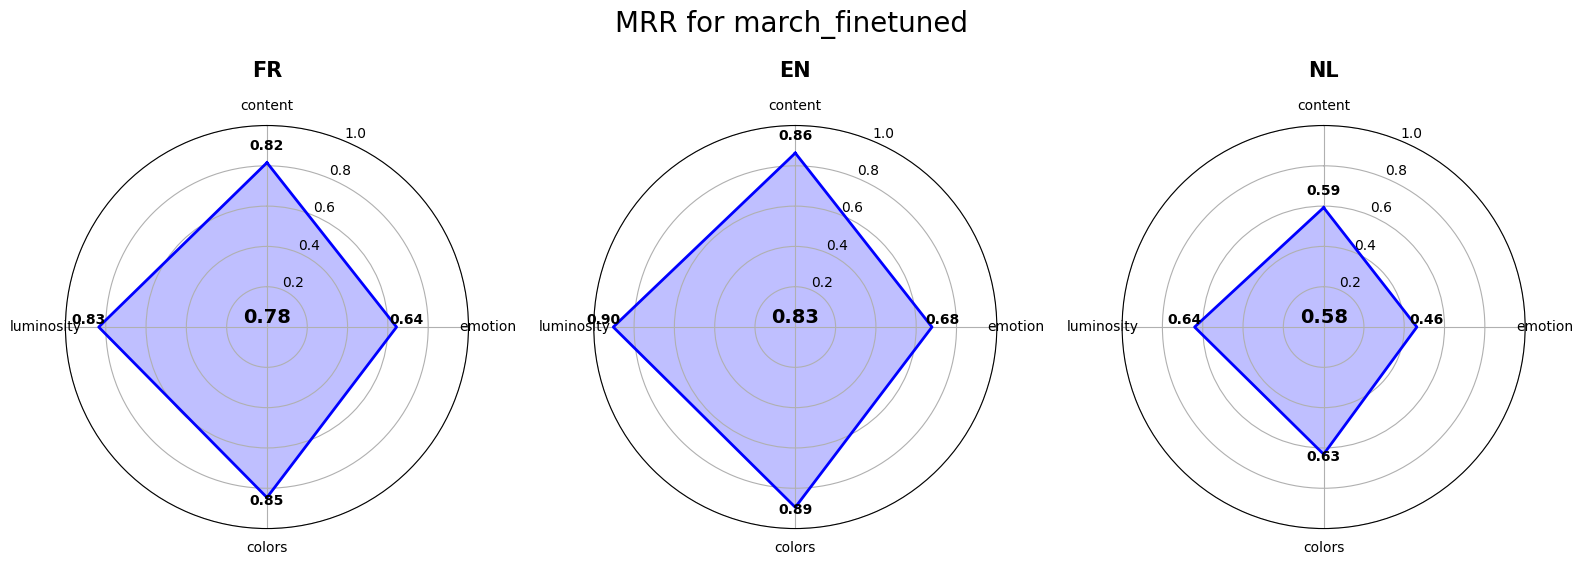

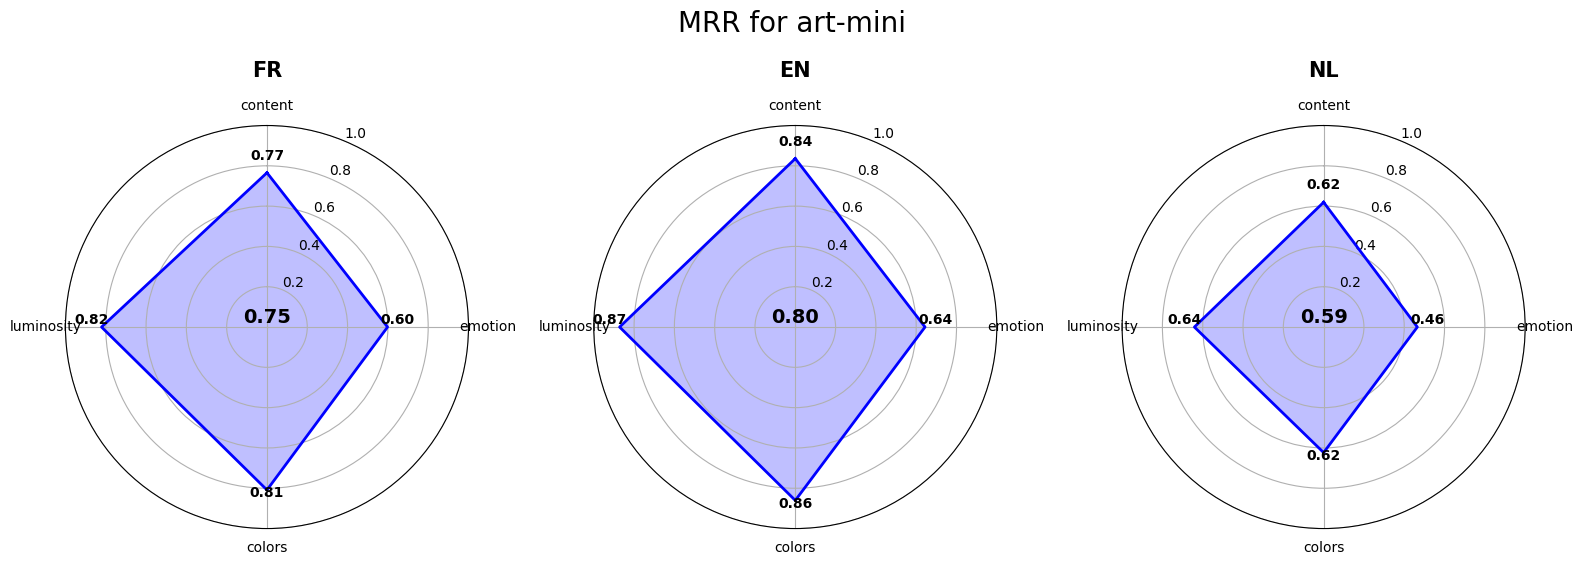

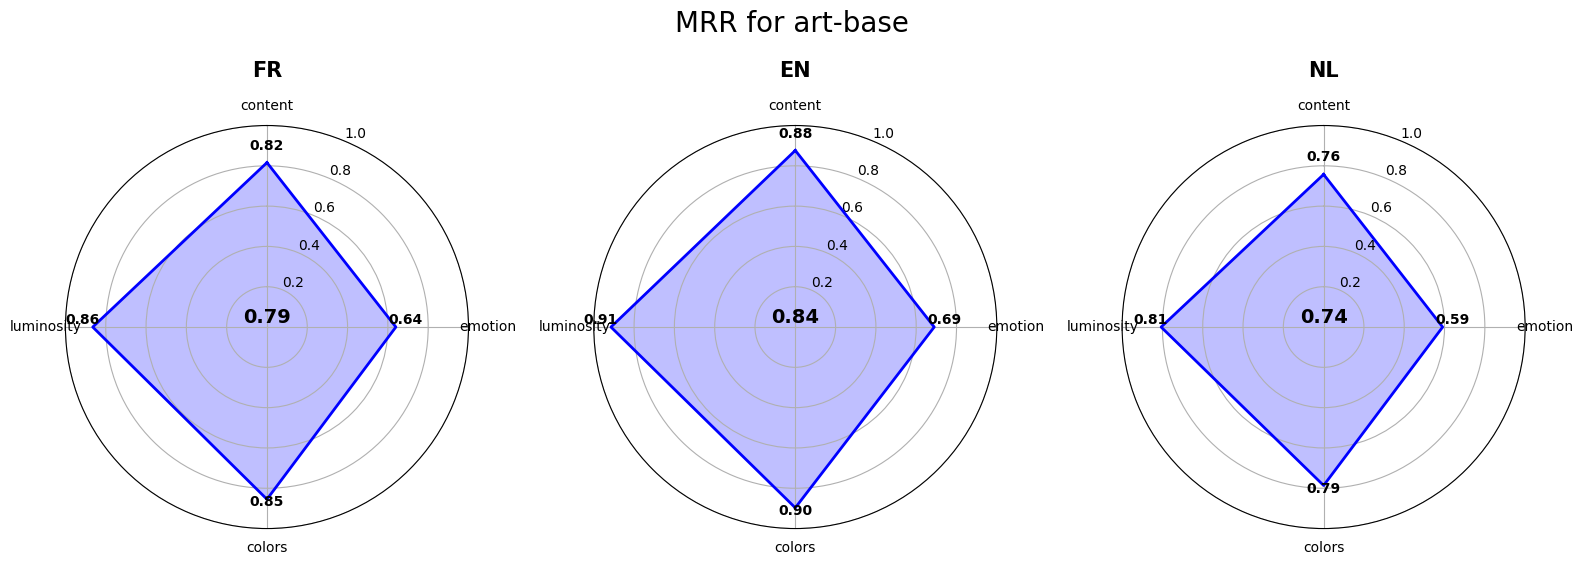

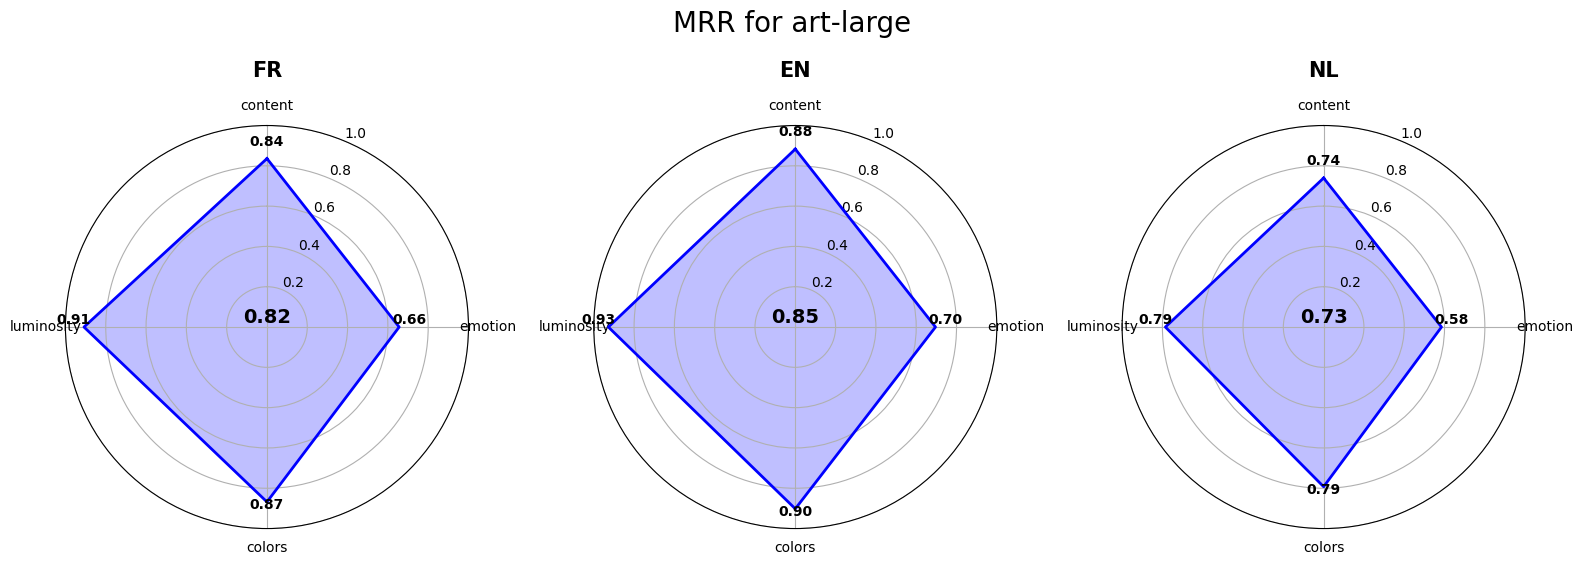

In [38]:
# For each model, a spider graph with recall@5 for each focus and for each language
def plot_spider_graph(model_name):
    fig, axs = plt.subplots(1, 3, figsize=(16, 5), subplot_kw=dict(polar=True))

    langs = ["FR", "EN", "NL"]
    selected_focuses = ["content", "emotion", "colors", "luminosity"]
    for lang_index, lang in enumerate(langs):
        
        ax = axs[lang_index]

        # Define the number of variables
        num_vars = len(selected_focuses) # we remove the "all_focus"
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

        # The plot is a circle, so we need to "complete the loop" and append the start value to the end.
        model_df = dataframes_per_model[model_name]
        values = [model_df[focus].loc[model_df[focus]["lang"] == lang]["mrr"].values[0] for focus in selected_focuses]
        values += values[:1]
        angles += angles[:1]

        # Draw one axe per variable and add labels
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        ax.set_xticks(angles[:-1], selected_focuses)

        # Draw ylabels
        ax.set_ylim(0, 1)

        # Plot data
        ax.plot(angles, values, color='b', linewidth=2, linestyle='solid')
        ax.fill(angles, values, color='b', alpha=0.25)

        # Add labels for each point
        for i, value in enumerate(values[:-1]):
            ax.text(angles[i], value + 0.05, f"{value:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

        # Add the mean in the center
        mean_value = model_df["all_focus"].loc[model_df["all_focus"]["lang"] == lang]["mrr"].values[0]
        ax.text(0, 0, f"{mean_value:.2f}", ha='center', va='bottom', fontsize=14, fontweight='bold')

        ax.set_title(f"{lang}", size=15, color='black', y=1.1, fontweight='bold')

    # Add title
    plt.tight_layout()
    plt.suptitle(f"MRR for {model_name}", size=20, color='black', y=1.1)
    plt.savefig(f"../../figures/analysis/spider_graphs/mrr_{model_name}.png", dpi=300, bbox_inches='tight')
    plt.show()

for model_name in models_name:
    plot_spider_graph(model_name)